Environment set up 

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Models to try
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Set style for plots
sns.set_style('whitegrid')
%matplotlib inline

Loading and data Exploratory 

In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\kanzi\Downloads\Iris (1).csv')

# Display first 5 rows
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Statistical summary
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
# Check for missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# Count of each species
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Data Visualization

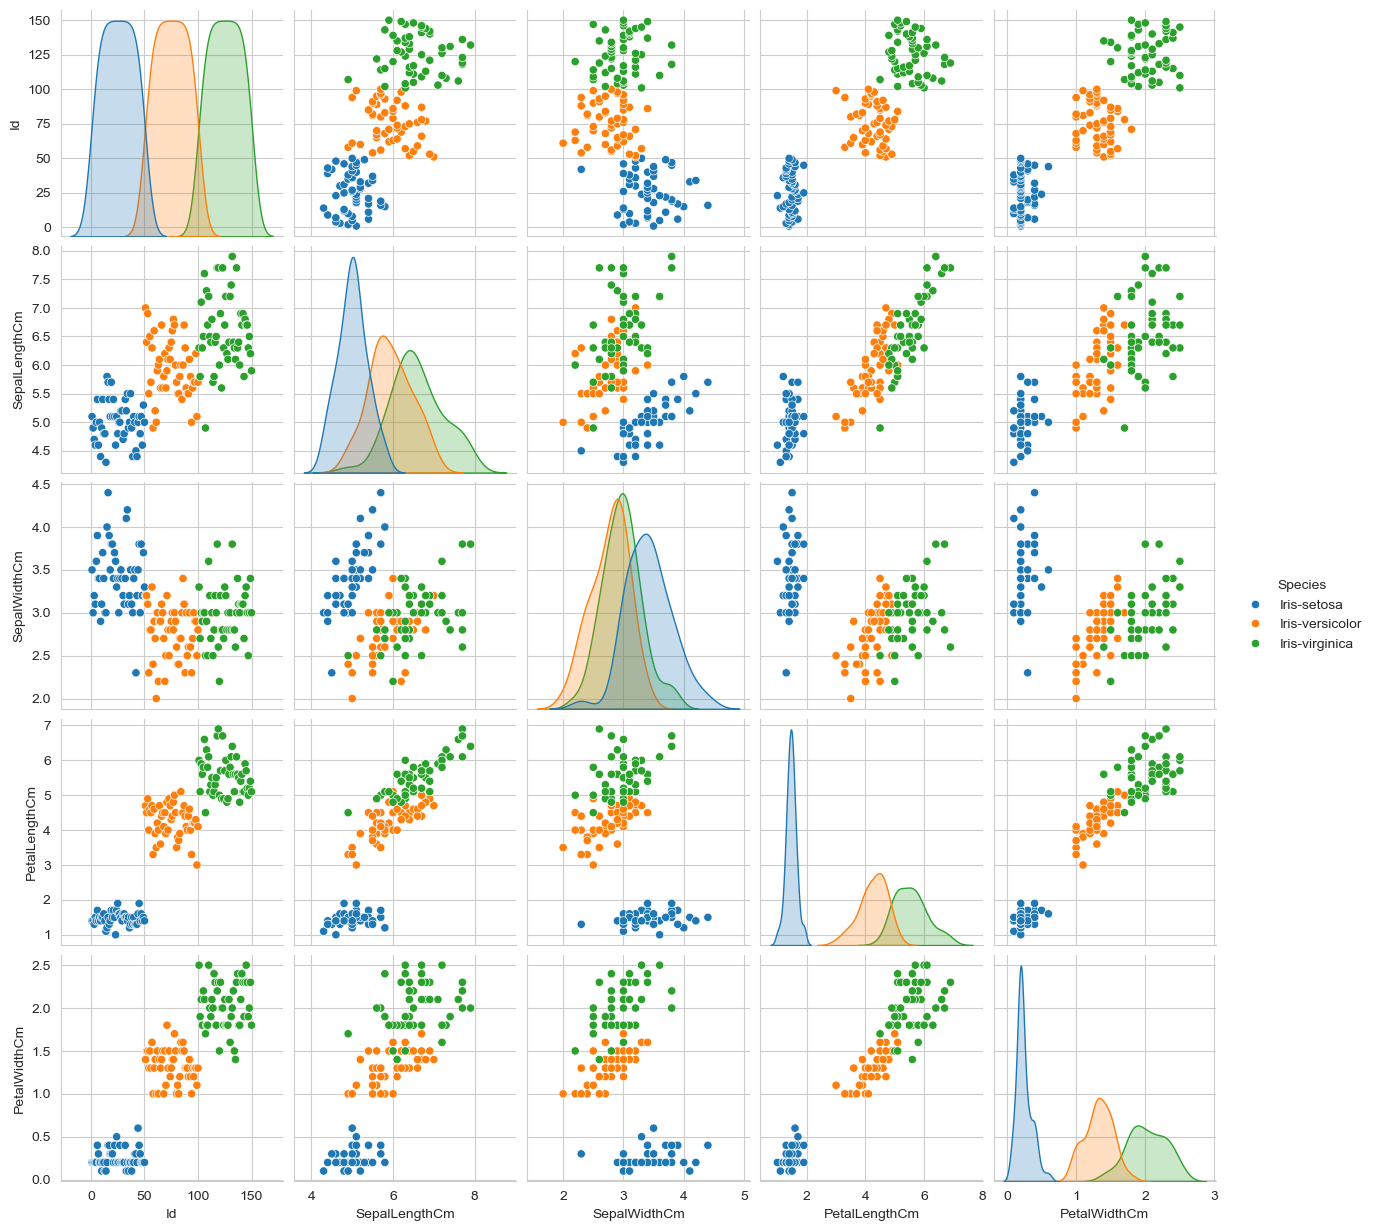

In [7]:
# Pairplot to see relationships between features
sns.pairplot(df, hue='Species')
plt.show()

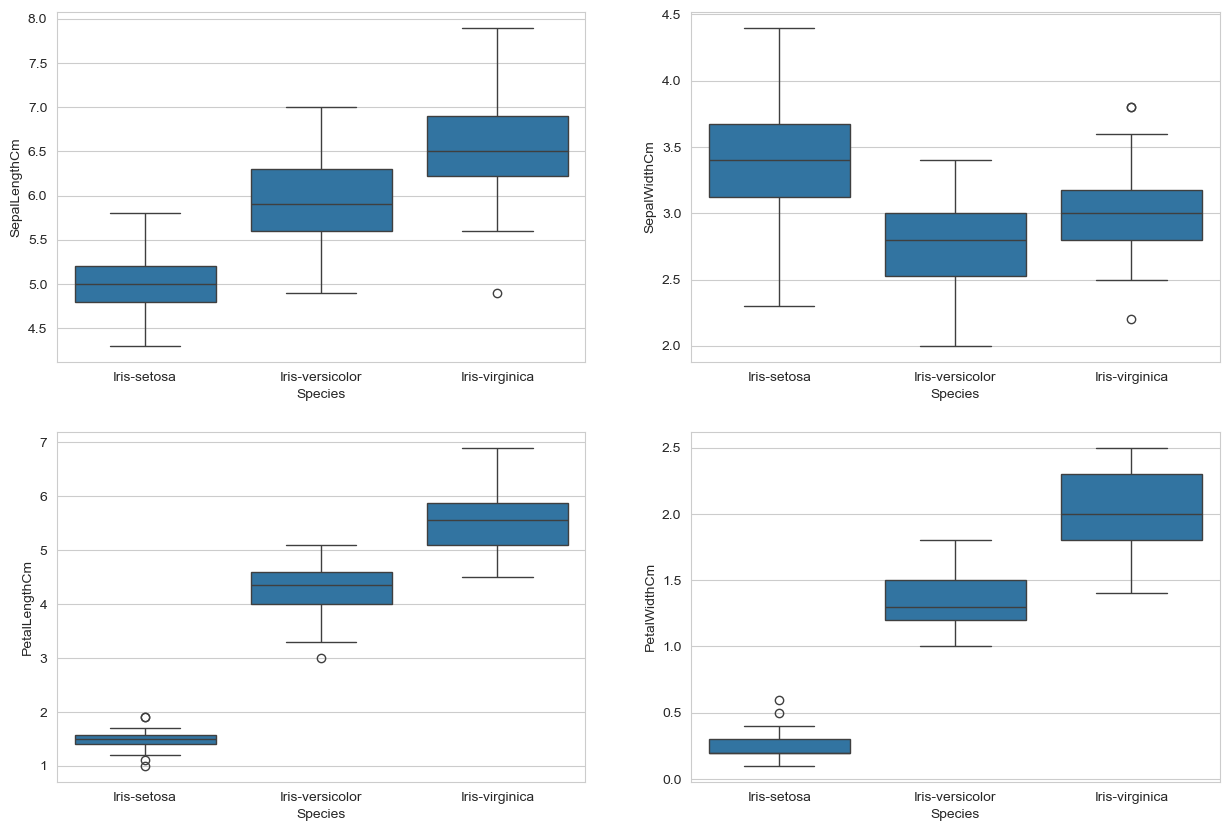

In [8]:
# Boxplots for each feature by species
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.subplot(2, 2, 2)
sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.subplot(2, 2, 3)
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.subplot(2, 2, 4)
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.show()

DATA PREPOCESSING

In [9]:
# Drop the Id column as it's not needed
df = df.drop('Id', axis=1)

# Encode the species labels
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

# Separate features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (120, 4)
Testing set shape: (30, 4)


Model Training and Evaluation

In [10]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*50 + "\n")

Logistic Regression Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


K-Nearest Neighbors Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Decision Tree Accuracy: 1.0000
              preci

Model Comparison and Selection

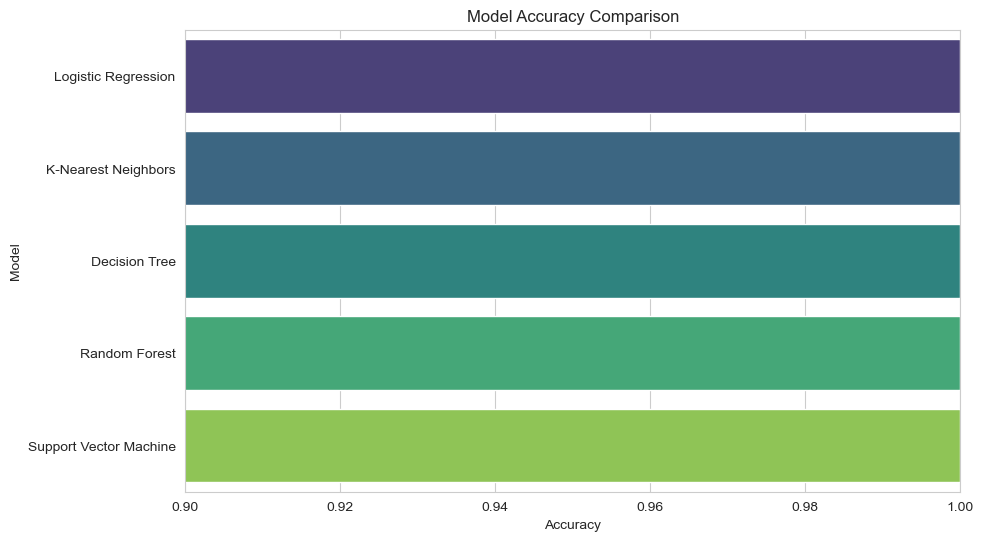

In [11]:
# Compare model performances
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values('Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', hue='Model', data=results_df, palette='viridis', legend=False)
plt.title('Model Accuracy Comparison')
plt.xlim(0.9, 1.0)
plt.show()

Feature Importance (for tree-based models)

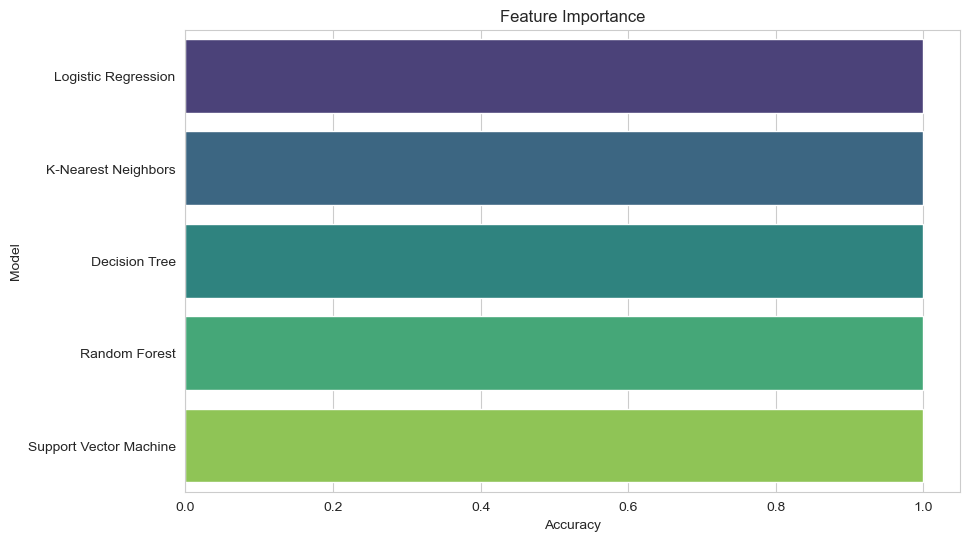

In [12]:
# Feature importance for Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', hue='Model', data=results_df, palette='viridis', legend=False)
plt.title('Feature Importance')
plt.show()

Final Model Selection and Testing

In [13]:
# Select the best model (Random Forest in this case)
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)

# Final evaluation
final_pred = best_model.predict(X_test)
print(f"Final Model Accuracy: {accuracy_score(y_test, final_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, final_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, final_pred))

Final Model Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Saving the Model

In [14]:
import joblib

# Save the model
joblib.dump(best_model, 'iris_classifier.pkl')

# Save the encoder
joblib.dump(encoder, 'label_encoder.pkl')

['label_encoder.pkl']

Creating a Simple Prediction Function

In [15]:
def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    # Load the model and encoder
    model = joblib.load('iris_classifier.pkl')
    encoder = joblib.load('label_encoder.pkl')
    
    # Create a dataframe with the input
    input_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                            columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
    
    # Make prediction
    prediction = model.predict(input_data)
    
    # Decode the prediction
    species = encoder.inverse_transform(prediction)
    
    return species[0]

# Example usage
print(predict_iris(5.1, 3.5, 1.4, 0.2))  # Should predict Iris-setosa
print(predict_iris(6.3, 3.3, 6.0, 2.5))  # Should predict Iris-virginica

Iris-setosa
Iris-virginica
